# **Exercise 00: line chart**

Prepare the project:

In [1]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import allowed modules:

In [3]:
import sqlite3

import pandas as pd

Import allowed entities:

In [4]:
from pandas import DataFrame
from sqlite3 import Connection

Create a dictionary for connection to the database:

In [5]:
conn_params: dict = {"db_file": "checking_logs.sqlite", "db_file_path": "../../data/", }

## Make a connection to the [database](https://drive.google.com/open?id=1zQ8AR2Ry3ajzB3UZO1Sfk3xtDJlzQF2M):

In [6]:
conn: Connection = sqlite3.connect(conn_params["db_file_path"] + conn_params["db_file"], )

Check connection:

In [7]:
conn.cursor().execute("SELECT 123;", );

Create a query:

In [8]:
sql_q: str = """
             SELECT
                 pageviews.datetime AS datetime
             FROM
                 pageviews
             WHERE
                 pageviews.uid LIKE 'user_%';
             """

## Run a query that gets the `datetime` from the `pageviews` table, selecting only the users and not the admins:

In [9]:
datetimes: DataFrame = pd.io.sql.read_sql(
    sql_q,
    conn,
    parse_dates=["datetime", ],
)

Check a query result:

In [10]:
datetimes.head()

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144


Create field `date` for *Pandas* dataframe:

In [11]:
datetimes["date"] = datetimes["datetime"].dt.date

Check updated *Pandas* dataframe:

In [12]:
datetimes.head()

,datetime,date
0,2020-04-17 22:46:26.785035,2020-04-17
1,2020-04-18 10:53:52.623447,2020-04-18
2,2020-04-18 10:56:55.833899,2020-04-18
3,2020-04-18 10:57:37.331258,2020-04-18
4,2020-04-18 12:05:48.200144,2020-04-18


## Using *Pandas*, create a new dataframe where the `visits` are counted and grouped by `date`:

In [13]:
visits: DataFrame = datetimes.groupby("date", ).size().reset_index(name="views", )

Check a new *Pandas* dataframe:

In [14]:
visits.head()

,date,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1


## Using *Pandas* method `.plot()`, create a graph:

* The size of the font should be `8`.
* The size of the figure is `(16, 8)`.
* The graph must have the title `Views per day`.
* Notice the rotation of `xticks` on the graph below:

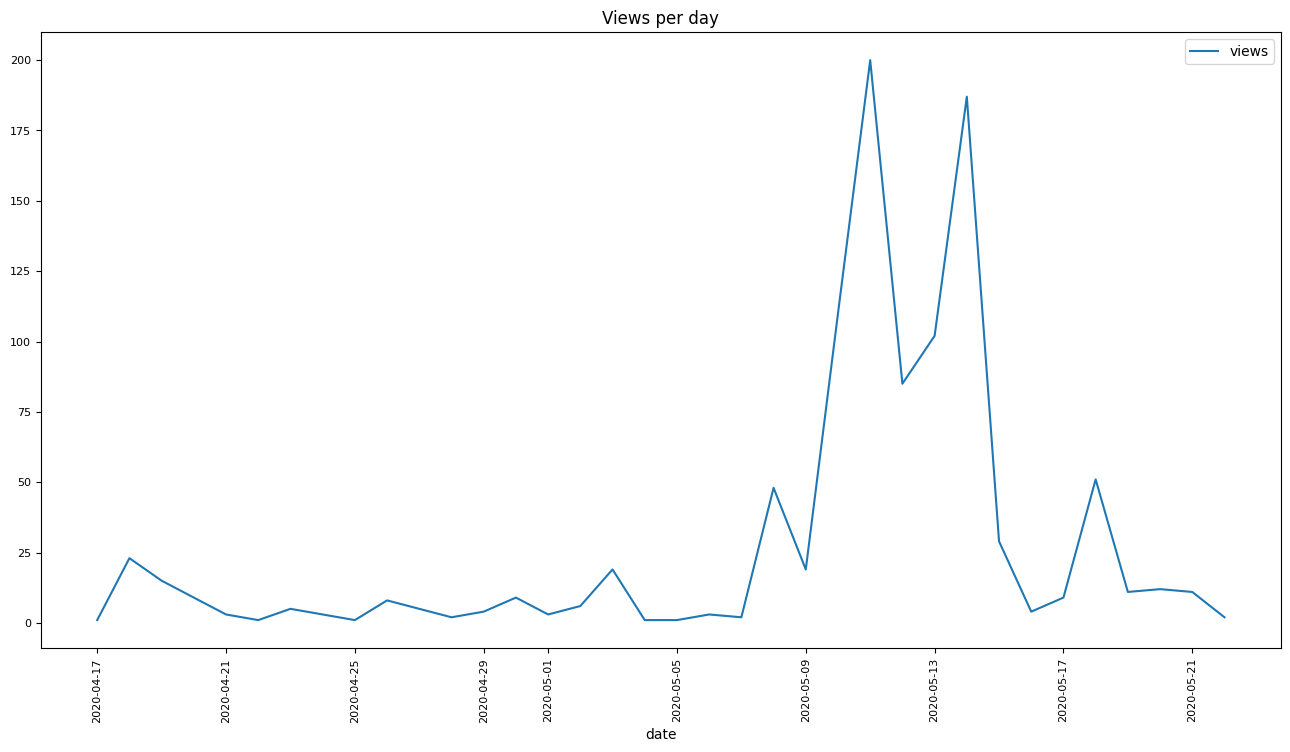

In [15]:
visits.plot(
    x="date",
    fontsize=8,
    figsize=(16, 8, ),
    title="Views per day",
    rot=90,
);

## Close the connection to the database:

In [16]:
conn.close()